In [1]:
import numpy as np
import keras
from keras.datasets import fashion_mnist
from keras.models import Model
from keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose
import matplotlib.pyplot as plt

In [2]:
# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Define and train the autoencoder model
input_shape = (28, 28, 1)
latent_dim = 64

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Encoder
encoder_input = Input(shape=input_shape)
encoder_output = Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_input)
encoder_output = Conv2D(64, (3, 3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(128, (3, 3), activation='relu', padding='same')(encoder_output)
encoder_output = Flatten()(encoder_output)
encoder_output = Dense(latent_dim, activation='relu')(encoder_output)

In [4]:
# Decoder
decoder_input = Input(shape=(latent_dim,))
decoder_output = Dense(6272, activation='relu')(decoder_input)
decoder_output = Reshape((7, 7, 128))(decoder_output)
decoder_output = Conv2DTranspose(64, (3, 3), strides=(2, 2), activation='relu', padding='same')(decoder_output)
decoder_output = Conv2DTranspose(32, (3, 3), strides=(2, 2), activation='relu', padding='same')(decoder_output)
decoder_output = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(decoder_output)

In [5]:
# Create encoder model
encoder = Model(encoder_input, encoder_output)

# Create decoder model
decoder = Model(decoder_input, decoder_output)

In [6]:
# Create autoencoder model by connecting encoder and decoder
autoencoder_input = Input(shape=input_shape)
autoencoder_output = decoder(encoder(autoencoder_input))
autoencoder = Model(autoencoder_input, autoencoder_output)

In [7]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 model (Functional)          (None, 64)                6515264   
                                                                 
 model_1 (Functional)        (None, 28, 28, 1)         500225    
                                                                 
Total params: 7,015,489
Trainable params: 7,015,489
Non-trainable params: 0
_________________________________________________________________


In [8]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 1078s 2s/step - loss: 0.3119 - val_loss: 0.2786
Epoch 2/10
469/469 [==============================] - 1034s 2s/step - loss: 0.2719 - val_loss: 0.2702
Epoch 3/10
469/469 [==============================] - 1063s 2s/step - loss: 0.2662 - val_loss: 0.2666
Epoch 4/10
469/469 [==============================] - 1019s 2s/step - loss: 0.2636 - val_loss: 0.2648
Epoch 5/10
469/469 [==============================] - 1054s 2s/step - loss: 0.2619 - val_loss: 0.2635
Epoch 6/10
469/469 [==============================] - 1013s 2s/step - loss: 0.2607 - val_loss: 0.2628
Epoch 7/10
469/469 [==============================] - 1012s 2s/step - loss: 0.2600 - val_loss: 0.2624
Epoch 8/10
469/469 [==============================] - 1013s 2s/step - loss: 0.2593 - val_loss: 0.2620
Epoch 9/10
469/469 [==============================] - 1055s 2s/step - loss: 0.2588 - val_loss: 0.2612
Epoch 10/10
469/469 [==============================] - 1049s 2s/step - loss: 0.258

In [9]:
# Use the trained autoencoder to encode and decode the test images
decoded_images = autoencoder.predict(x_test)

313/313 [==============================] - 46s 147ms/step


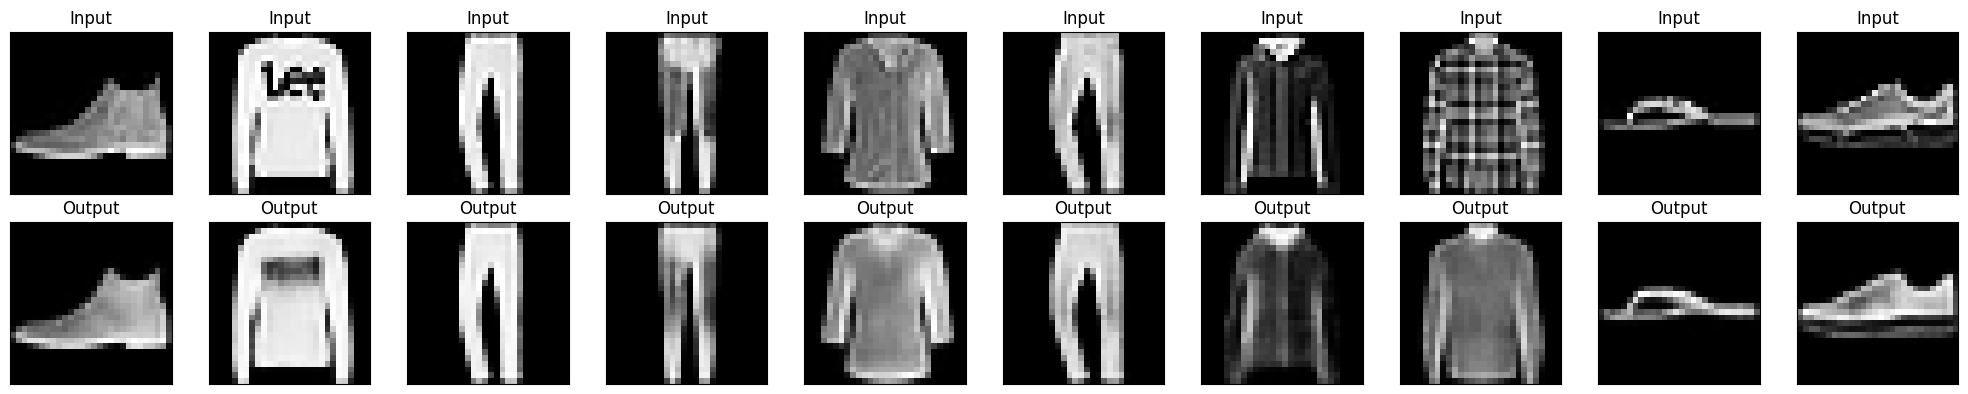

In [10]:
# Plot the input and nearby output images
n = 10  # Number of images to plot
plt.figure(figsize=(20, 4))

for i in range(n):
    # Plotting input images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title('Input')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Plotting output images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(28, 28), cmap='gray')
    plt.title('Output')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

# Meh

You get what you pay for. It's a tiny network that trained in 3 hours